🎬 Animasyon HTML formatında yükleniyor...



🌳 MINIMUM SPANNING TREE (MST) SONUÇLARI:
Kenar: 0 ↔ 1 | Ağırlık: 4
Kenar: 0 ↔ 7 | Ağırlık: 8
Kenar: 7 ↔ 6 | Ağırlık: 1
Kenar: 6 ↔ 5 | Ağırlık: 2
Kenar: 5 ↔ 2 | Ağırlık: 4
Kenar: 2 ↔ 8 | Ağırlık: 2
Kenar: 2 ↔ 3 | Ağırlık: 7
Kenar: 3 ↔ 4 | Ağırlık: 9
🎯 Toplam MST Ağırlığı: 37
📊 Big-O Karmaşıklık: O(E log V) = O(14 log 9)
🚀 Algoritma: Min-Heap tabanlı Prim's Algorithm


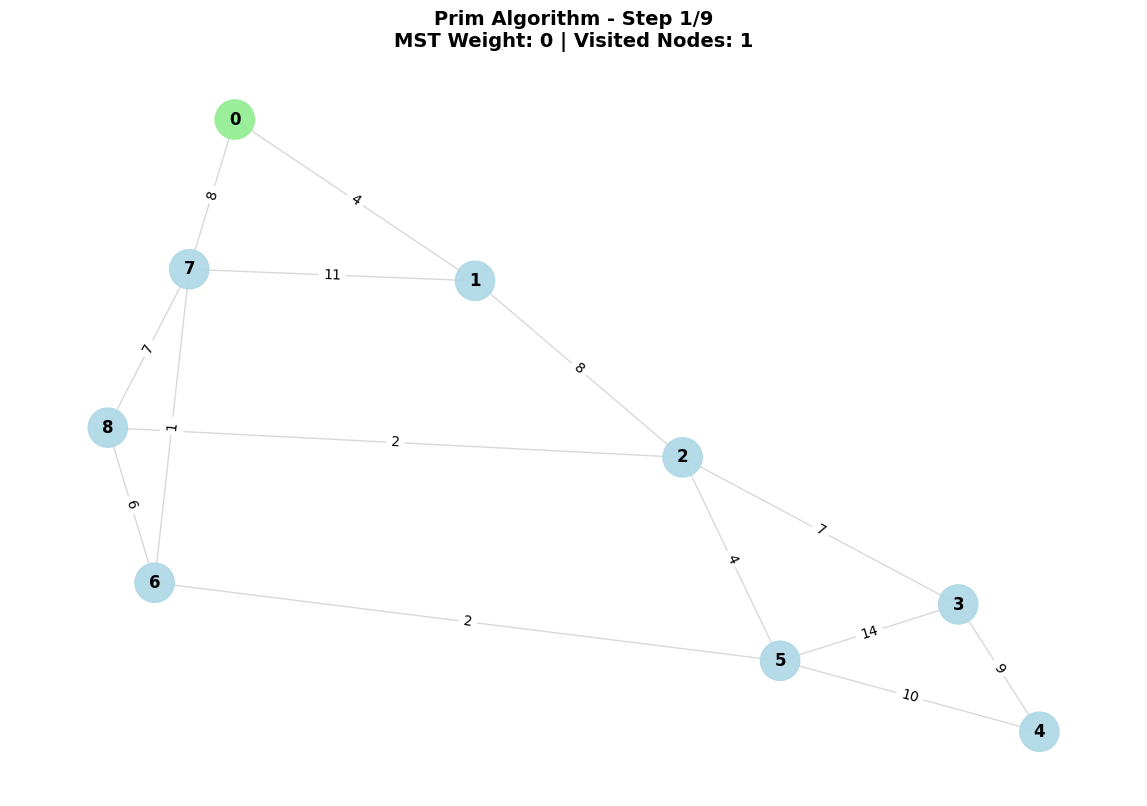

In [7]:
# Prim's Algorithm - Minimum Spanning Tree (MST) - Animasyonlu Görselleştirme
# Big-O Karmaşıklığı: O(E log V) - E: kenar sayısı, V: düğüm sayısı

# Jupyter notebook için matplotlib ayarları (uyumlu backend)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import heapq
from collections import defaultdict
import numpy as np
from IPython.display import HTML, display

def prim_algorithm_animated():
    # Graf oluşturma - örnek ağırlıklı graf
    G = nx.Graph()
    edges = [(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 8, 2), 
             (2, 5, 4), (3, 4, 9), (3, 5, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), 
             (6, 8, 6), (7, 8, 7)]
    G.add_weighted_edges_from(edges)
    
    # Düğüm pozisyonları - sabit konumlar için
    pos = nx.spring_layout(G, seed=42)
    
    # Animasyon için değişkenler
    mst_edges = []  # MST kenarları
    visited = set()  # Ziyaret edilen düğümler
    animation_steps = []  # Animasyon adımları
    
    # Prim algoritması - Min-Heap kullanarak O(E log V) karmaşıklık
    def prim_mst():
        # Başlangıç düğümü (0) - keyfi seçim
        start_node = 0
        visited.add(start_node)
        
        # Min-heap: (ağırlık, düğüm1, düğüm2) formatında
        heap = []
        
        # Başlangıç düğümünün tüm kenarlarını heap'e ekle
        for neighbor in G.neighbors(start_node):
            weight = G[start_node][neighbor]['weight']
            heapq.heappush(heap, (weight, start_node, neighbor))
        
        # Her adımı animasyon için kaydet
        animation_steps.append((set(visited.copy()), list(mst_edges)))
        
        # MST tamamlanana kadar devam et
        while heap and len(visited) < len(G.nodes()):
            # En küçük ağırlıklı kenarı al
            weight, u, v = heapq.heappop(heap)
            
            # Eğer hedef düğüm zaten ziyaret edilmişse atla (cycle prevention)
            if v in visited:
                continue
            
            # Yeni düğümü MST'ye ekle
            visited.add(v)
            mst_edges.append((u, v, weight))
            
            # Yeni düğümün komşularını heap'e ekle
            for neighbor in G.neighbors(v):
                if neighbor not in visited:
                    edge_weight = G[v][neighbor]['weight']
                    heapq.heappush(heap, (edge_weight, v, neighbor))
            
            # Bu adımı animasyon için kaydet
            animation_steps.append((set(visited.copy()), list(mst_edges)))
    
    # MST algoritmasını çalıştır
    prim_mst()
    
    # Animasyon fonksiyonu (optimize edilmiş)
    def animate(frame):
        ax.clear()  # Daha verimli temizleme
        
        # Mevcut adımın verilerini al
        current_visited, current_mst = animation_steps[frame]
        
        # Tüm kenarları gri renkte çiz (background)
        nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray', width=1, ax=ax)
        
        # MST kenarlarını kırmızı renkte çiz
        if current_mst:
            mst_edge_list = [(u, v) for u, v, w in current_mst]
            nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, 
                                 edge_color='red', width=3, alpha=0.8, ax=ax)
        
        # Düğümleri çiz - ziyaret edilenler yeşil, edilmeyenler mavi
        node_colors = ['lightgreen' if node in current_visited else 'lightblue' 
                      for node in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                             node_size=800, alpha=0.9, ax=ax)
        
        # Düğüm labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', ax=ax)
        
        # Kenar ağırlıklarını göster
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10, ax=ax)
        
        # Başlık ve bilgi
        total_weight = sum([w for u, v, w in current_mst])
        ax.set_title(f'Prim Algorithm - Step {frame + 1}/{len(animation_steps)}\n'
                    f'MST Weight: {total_weight} | Visited Nodes: {len(current_visited)}',
                    fontsize=14, fontweight='bold')
        ax.axis('off')
    
    # Matplotlib figür oluştur
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Animasyonu çalıştır ve değişkende tut (uyarıyı önlemek için)
    anim = animation.FuncAnimation(fig, animate, frames=len(animation_steps),
                                 interval=2000, repeat=True, blit=False)
    
    plt.tight_layout()
    
    # Alternatif: HTML animasyon yerine statik adımları göster (daha kararlı)
    try:
        print("🎬 Animasyon HTML formatında yükleniyor...")
        display(HTML(anim.to_jshtml()))
    except Exception as e:
        print(f"⚠️ HTML animasyon hatası: {e}")
        print("📊 Alternatif: Statik adım-adım görselleştirme")
        
        # Her adımı statik olarak göster
        for i, (visited, mst) in enumerate(animation_steps[::2]):  # Her 2. adımı göster
            fig_static, ax_static = plt.subplots(figsize=(10, 6))
            
            # Graf çizimi
            nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray', width=1, ax=ax_static)
            
            if mst:
                mst_edge_list = [(u, v) for u, v, w in mst]
                nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, 
                                     edge_color='red', width=3, alpha=0.8, ax=ax_static)
            
            node_colors = ['lightgreen' if node in visited else 'lightblue' 
                          for node in G.nodes()]
            nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                                 node_size=600, alpha=0.9, ax=ax_static)
            
            nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax_static)
            
            edge_labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, ax=ax_static)
            
            total_weight = sum([w for u, v, w in mst])
            ax_static.set_title(f'Step {i*2 + 1}: MST Weight = {total_weight}', 
                               fontsize=12, fontweight='bold')
            ax_static.axis('off')
            
            plt.tight_layout()
            plt.show()
            
            if i >= 4:  # İlk 5 adımı göster
                print("... (Tüm adımlar için animasyonu çalıştırın)")
                break
    
    # Final MST bilgilerini yazdır
    print("\n🌳 MINIMUM SPANNING TREE (MST) SONUÇLARI:")
    print("=" * 50)
    total_weight = 0
    for u, v, weight in mst_edges:
        print(f"Kenar: {u} ↔ {v} | Ağırlık: {weight}")
        total_weight += weight
    print("=" * 50)
    print(f"🎯 Toplam MST Ağırlığı: {total_weight}")  
    print(f"📊 Big-O Karmaşıklık: O(E log V) = O({len(G.edges())} log {len(G.nodes())})")
    print(f"🚀 Algoritma: Min-Heap tabanlı Prim's Algorithm")
    
    # Animasyonu return et (garbage collection'ı önlemek için)
    return anim

# Algoritmayı çalıştır ve animasyonu tut
animation_obj = prim_algorithm_animated()
